# Dynamic Programming - Group 'Lost in Optimization' - Main python notebook

Install dependencies and set magics:

In [13]:
%load_ext autoreload
%autoreload 2

#%pip install EconModel
#%pip install ConSav
#%pip install quantecon

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
nb.set_num_threads(4) #perhaps set to 8

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initial solve of the models

Set amount of periods:

In [14]:
model_negm = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','do_print':False})
model_negm.precompile_numba() # solve with very coarse grids
model_negm.solve()
model_negm.simulate()

1
0
1
2
0
0
1
2
59
0
1
2
58
0
1
2
57
0
1
2
56
0
1
2
55
0
1
2
54
0
1
2
53
0
1
2
52
0
1
2
51
0
1
2
50
0
1
2
49
0
1
2
48
0
1
2
47
0
1
2
46
0
1
2
45
0
1
2
44
0
1
2
43
0
1
2
42
0
1
2
41
0
1
2
40
0
1
2
39
0
1
2
38
0
1
2
37
0
1
2
36
0
1
2
35
0
1
2
34
0
1
2
33
0
1
2
32
0
1
2
31
0
1
2
30
0
1
2
29
0
1
2
28
0
1
2
27
0
1
2
26
0
1
2
25
0
1
2
24
0
1
2
23
0
1
2
22
0
1
2
21
0
1
2
20
0
1
2
19
0
1
2
18
0
1
2
17
0
1
2
16
0
1
2
15
0
1
2
14
0
1
2
13
0
1
2
12
0
1
2
11
0
1
2
10
0
1
2
9
0
1
2
8
0
1
2
7
0
1
2
6
0
1
2
5
0
1
2
4
0
1
2
3
0
1
2
2
0
1
2
1
0
1
2
0
0
1
2


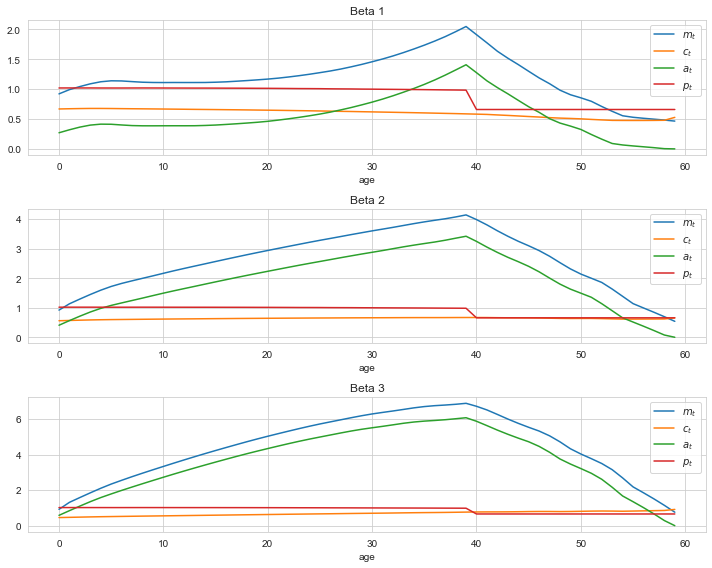

In [15]:
# a. unpack
par = model_negm.par
sim = model_negm.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$'),
             ('p','$p_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

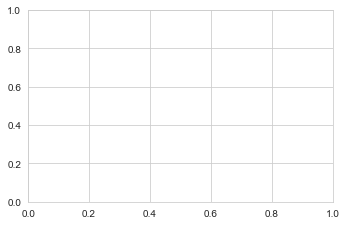

In [16]:
model_negm.lifecycle()

In [12]:
model_nvfi = DurableConsumptionModelClass(name='example_nvfi',par={'solmethod':'nvfi','T':T,'do_print':False})
model_nvfi.precompile_numba() # solve with very coarse grids
model_nvfi.solve()
model_nvfi.simulate()

NameError: name 'T' is not defined

Solve model with VFI:

In [48]:
model_vfi = DurableConsumptionModelClass(name='example_vfi',par={'solmethod':'vfi','T':T,'do_print':False})
model_vfi.precompile_numba() # solve with very coarse grids
model_vfi.solve()
model_vfi.simulate()

1
0
1
2
0
0
1
2
2
0
1
2
1
0
1
2
0
0
1
2


Solve model with NVFI:

In [4]:
model_vfi.simulate()

In [7]:
model_nvfi.sim.a[1,1,:]

array([4.13779766e-09, 3.34318662e-09, 3.33100014e-09, ...,
       4.65473393e-09, 4.30457225e-09, 4.43006032e-09])

In [5]:
import matplotlib.pyplot as plt

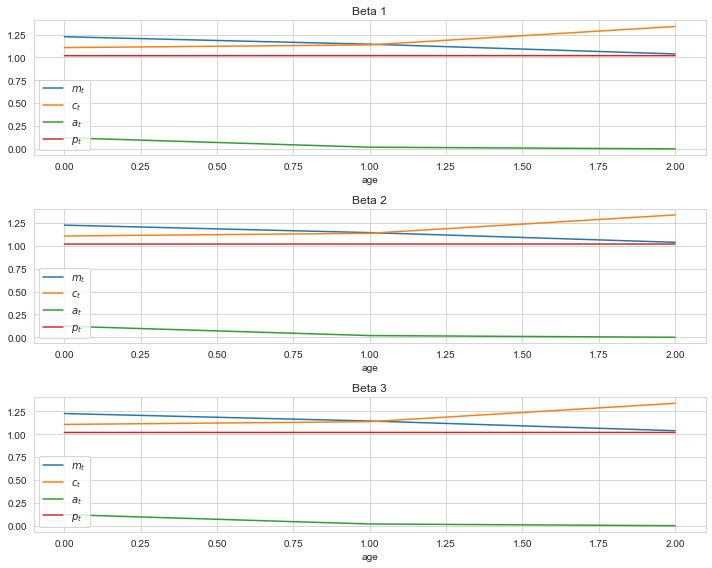

In [14]:
# a. unpack
par = model_nvfi.par
sim = model_nvfi.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$'),
             ('p','$p_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

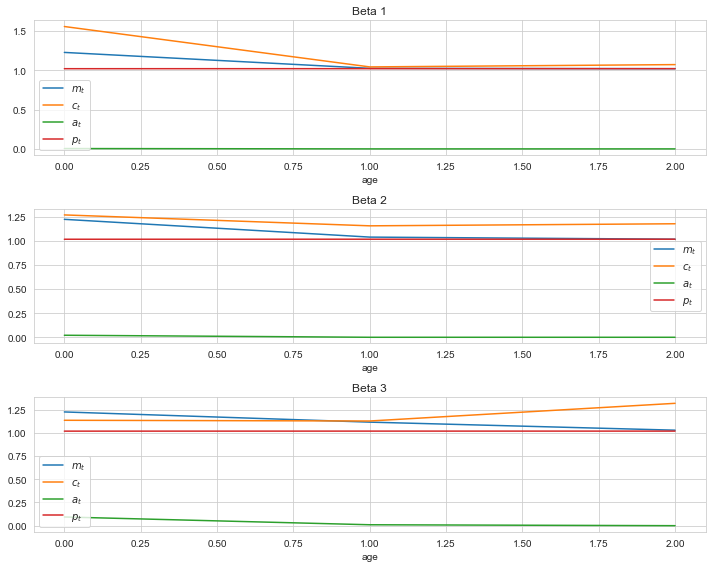

In [49]:
# a. unpack
par = model_vfi.par
sim = model_vfi.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$'),
             ('p','$p_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

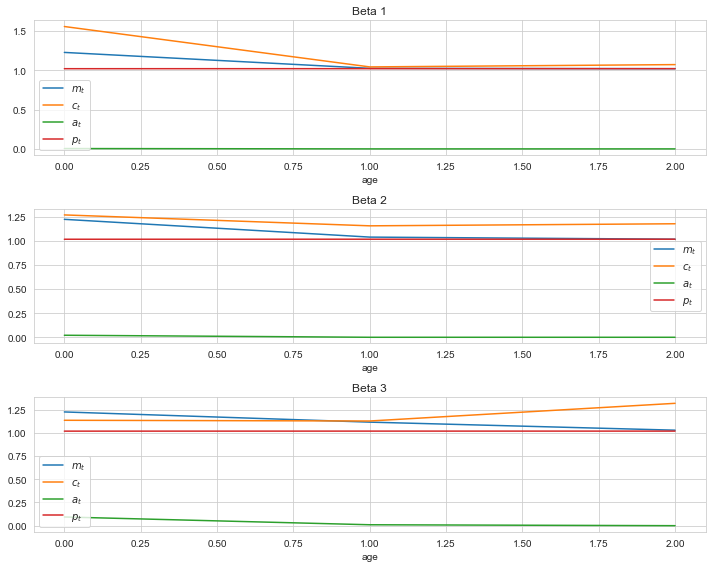

In [58]:
# a. unpack
par = model_vfi.par
sim = model_vfi.sim

# b. figure
fig, axs = plt.subplots(len(par.Betas), 1, figsize=(10, 8))

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$'),
             ('p','$p_t$')]

age = np.arange(par.T)

for b in range(len(par.Betas)):  # loop over beta dimension
    ax = axs[b]  # specify the current subplot

    for simvar, simvarlatex in simvarlist:
        # get simulation data
        simdata = getattr(sim, simvar)

        # calculate mean over individual dimension for each beta
        mean_data = np.mean(simdata[:, b, :], axis=1)

        # plot mean data
        ax.plot(age, mean_data, label=simvarlatex)

    ax.grid(True)
    ax.set_xlabel('age')
    ax.set_title(f'Beta {b+1}')
    ax.legend()

# adjust layout for better visualization
plt.tight_layout()
plt.show()

In [66]:
model_vfi.sol.c_keep[:,2,:]

array([[[[ 0.        ,  0.02146896,  0.04461597, ...,  3.63258956,
           3.72801247,  3.83722351],
         [ 0.        ,  0.03026259,  0.05192489, ...,  3.45640253,
           3.54699685,  3.65068429],
         [ 0.        ,  0.04015995,  0.0606068 , ...,  3.40044842,
           3.48931894,  3.59103408],
         ...,
         [ 0.        ,  0.06379715,  0.12789918, ...,  3.71640372,
           3.79773483,  3.89166865],
         [ 0.        ,  0.06379715,  0.12789918, ...,  3.73665941,
           3.81890877,  3.91177187],
         [ 0.        ,  0.06379715,  0.12789918, ...,  3.7610219 ,
           3.84321812,  3.93601867]],

        [[ 0.        ,  0.04219062,  0.07211336, ...,  3.6639142 ,
           3.759362  ,  3.86860066],
         [ 0.        ,  0.0533299 ,  0.07913234, ...,  3.48614239,
           3.57676102,  3.68047554],
         [ 0.        ,  0.06379715,  0.08588722, ...,  3.4296225 ,
           3.51851697,  3.62025885],
         ...,
         [ 0.        ,  0.06379715

In [3]:
model_nvfi = DurableConsumptionModelClass(name='example_nvfi',par={'solmethod':'nvfi','T':T,'do_print':False})
model_nvfi.precompile_numba() # solve with very coarse grids
model_nvfi.solve()
model_nvfi.simulate()
model_nvfi.save()

Solve model with NEGM:

In [32]:
model_negm = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','T':T,'do_print':False})
model_negm.precompile_numba() # solve with very coarse grids
model_negm.solve()
model_negm.simulate()
#model_negm.save()

In [44]:
model_vfi.lifecycle()


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fe22d39b940> (for post_execute):


KeyboardInterrupt: 

Different versions of beta:

Now possible to compare solutions:

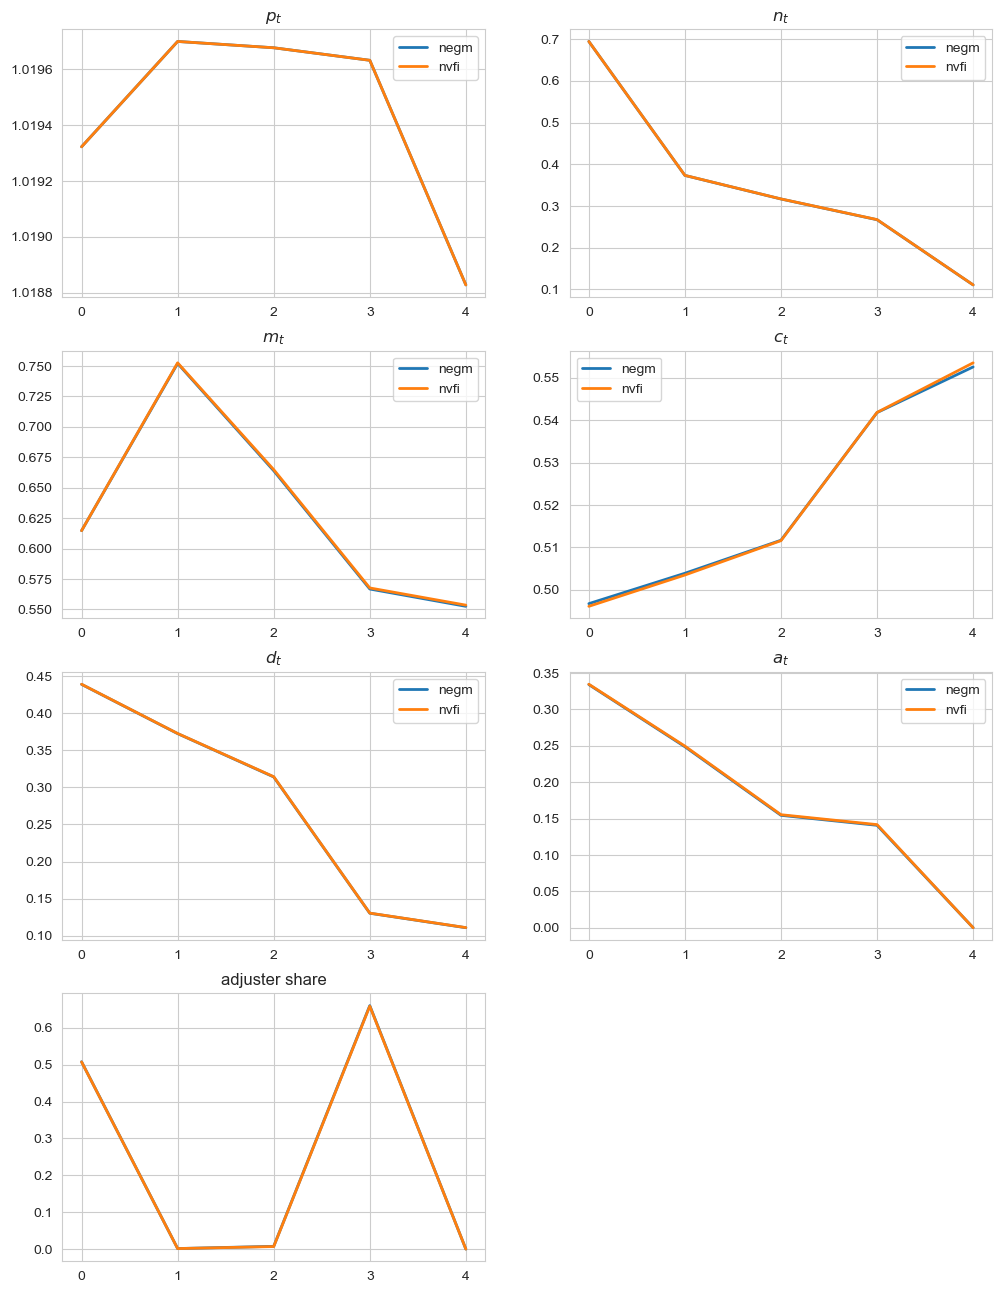

In [5]:
from figs import lifecycle_compare
lifecycle_compare(model_negm,'negm',model_nvfi,'nvfi')

## Timing the model solution methods

### Timing function

In [ ]:
def run(name = 'baseline',
        rep = 5, # set to 5 in the paper
        load = False,
        solmethod = 'negm',
        updpar = {},
        do_simple_wq = False,
        do_print = False):
    
    # a. create model
    par = {'solmethod':solmethod,'do_print':do_print,'do_simple_wq':do_simple_wq,**updpar}
    model = DurableConsumptionModelClass(name=name,load=load,par=par)
    
    # b. run
    if load == False:
        
        model.precompile_numba()        
        
        # ii. best of three
        best_time = np.inf
        for it in range(rep):
            
            model.solve()
            total_time = np.sum(model.par.time_w+model.par.time_keep+model.par.time_adj)
            
            if total_time < best_time:
            
                best_time = total_time
                time_w = model.par.time_w.copy()
                time_keep = model.par.time_keep.copy()
                time_adj= model.par.time_adj.copy()
            
            print(f'{it}: total time = {total_time:.2f}')
                
        # iii. collect infomation
        model.simulate(do_euler_error=True,do_utility=True)
        model.par.time_w = time_w.copy()
        model.par.time_keep = time_keep.copy()
        model.par.time_adj= time_adj.copy()
        model.save()
            
    # c. print progress
    print('')    
    model.print_analysis()        
    model.checksum(simple=True)
    print('')
    
    return model

### Settings

In [ ]:
models = dict()

basename = 'results'
T = 2
base = dict()
base['T'] = T

### Timings

In [ ]:
models['negm']  = run(name=f'{basename}', solmethod='negm', updpar=base)

In [ ]:
models['nvfi']  = run(name=f'{basename}', solmethod='nvfi', updpar=base)

In [ ]:
models['vfi']   = run(name=f'{basename}', solmethod='vfi', updpar=base)

### Time tables

In [ ]:
import tabs
main_models = [models['negm'],models['nvfi'],models['vfi']]
tabs.all(main_models,speedup=True)